In [1]:
#the code is based on https://www.analyticsvidhya.com/blog/2019/10/how-to-build-knowledge-graph-text-using-spacy/

In [4]:
import spacy
nlp = spacy.load('en_core_web_sm')

doc = nlp("The 22-year-old recently won ATP Challenger tournament.")

for tok in doc:
      print(tok.text, "...", tok.dep_)

The ... det
22-year ... npadvmod
- ... punct
old ... nsubj
recently ... advmod
won ... ROOT
ATP ... compound
Challenger ... compound
tournament ... dobj
. ... punct


In [5]:
import re
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy
# nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [47]:
# import wikipedia sentences
candidate_sentences = pd.read_csv("wiki_sentences_v2.csv")
candidate_sentences.shape
candidate_sentences.head(3)['sentence'][0]

'confused and frustrated, connie decides to leave on her own.'

In [51]:
for i in range(5):
    doc = nlp(candidate_sentences.head(5)['sentence'][i])
    #doc = nlp("A friend of mine and I were killing all living things that we could find last week")

    for tok in doc:
        print(tok.text, "...", tok.dep_)
        #print(tok.tag_)

confused ... advcl
and ... cc
frustrated ... conj
, ... punct
connie ... nsubj
decides ... ROOT
to ... aux
leave ... xcomp
on ... prep
her ... poss
own ... pobj
. ... punct
later ... advmod
, ... punct
a ... det
woman ... nsubjpass
’s ... punct
scream ... appos
is ... auxpass
heard ... ROOT
in ... prep
the ... det
distance ... pobj
. ... punct
christian ... nsubjpass
is ... auxpass
then ... advmod
paralyzed ... ROOT
by ... agent
an ... det
elder ... pobj
. ... punct
the ... det
temple ... nsubjpass
is ... auxpass
set ... ROOT
on ... prep
fire ... pobj
. ... punct
outside ... advmod
, ... punct
the ... det
cult ... nsubj
wails ... ROOT
with ... prep
him ... pobj
. ... punct


In [53]:
def get_entities(sent):
    ## chunk 1
    ent1 = ""
    ent2 = ""
    prv_tok_dep = ""    # dependency tag of previous token in the sentence
    prv_tok_text = ""   # previous token in the sentence
    prefix = ""
    modifier = ""

    for tok in nlp(sent):
        ## chunk 2
        # if token is a punctuation mark then move on to the next token
        if tok.dep_ != "punct":
            # check: token is a compound word or not
            if tok.dep_ == "compound":
                prefix = tok.text
                # if the previous word was also a 'compound' then add the current word to it
                if prv_tok_dep == "compound":
                    prefix = prv_tok_text + " "+ tok.text

        # check: token is a modifier or not
        if tok.dep_.endswith("mod") == True:
            modifier = tok.text
            # if the previous word was also a 'compound' then add the current word to it
            if prv_tok_dep == "compound":
                modifier = prv_tok_text + " "+ tok.text

        ## chunk 3
        if tok.dep_.find("subj") == True:
            ent1 = modifier +" "+ prefix + " "+ tok.text
            prefix = ""
            modifier = ""
            prv_tok_dep = ""
            prv_tok_text = ""      

        ## chunk 4
        if tok.dep_.find("obj") == True:
            ent2 = modifier +" "+ prefix +" "+ tok.text

        ## chunk 5  
        # update variables
        prv_tok_dep = tok.dep_
        prv_tok_text = tok.text
        #############################################################

    return [ent1.strip(), ent2.strip()]

In [68]:
entity_pairs = []

for i in tqdm(candidate_sentences["sentence"]):
    entity_pairs.append(get_entities(i))

  0%|          | 18/4318 [00:00<00:24, 176.30it/s]

confused and frustrated, connie decides to leave on her own.
later, a woman’s scream is heard in the distance.
christian is then paralyzed by an elder.
the temple is set on fire.
outside, the cult wails with him.
it's a parable of a woman's religious awakening—
c. mackenzie, and craig vincent joined the cast.
later, craig di francia and action bronson were revealed to have joined the cast.
sebastian maniscalco and paul ben-victor were later revealed as being part of the cast.
we just tried to make the film.
we went through all these tests and things  
m global was also circling to bid for the film's international sales rights.
canadian musician robbie robertson supervised the soundtrack.
it features both original and existing music tracks.
it is the worst reviewed film in the franchise.
but she injures quicksilver and accidentally kills mystique before flying away.
military forces tasked with her arrest.
the train is attacked by vuk and her d'bari forces.
kota eberhardt portrays telepa

  1%|▏         | 60/4318 [00:00<00:22, 188.36it/s]

due to this, the film became an ensemble piece.
it can't just look like big dinosaurs.
other actors perform the body.
production designer scott chambliss managed all the art directors.
the single was released on may 13, 2019.

all tracks are written by bear mccreary, except where noted.
the score is also conducted by mccreary.

on december 10, 2018, the film's first teaser poster and ccxp trailer were released.
in april 2019, the main theatrical poster was released online.
the film was originally scheduled to be released on june 8, 2018.
the collectible tickets were offered in two sizes: standard  and godzilla-sized .
the 4k release includes hdr10, hdr10
the retail exclusives will also include limited special clear files.
such heroes are ready with one-liners, puns, and dry quips.
it was action with a science fiction twist.
currently, action films requiring extensive stunt work and special effects tend to be expensive.
examples include the indiana jones franchise and many superhero fil

  2%|▏         | 104/4318 [00:00<00:21, 198.97it/s]

it is scheduled to be released theatrically by warner bros.
it's really been eye-opening for me.
i can't wait to see it.
they did it.
i can't wait to see it.
they did it.
film is a 1965 short film written by samuel beckett, his only screenplay.
a second draft was produced by 22 may and a 40-leaf shooting script followed thereafter.
both beckett and the director alan schneider were interested in zero mostel and jack macgowran.
beckett then suggested buster keaton.
this being his only visit to the united states.
david rayner clark directed max wall.
suddenly, the camera  shifts violently to the left.
the couple look at each other and the man
the camera cuts to the vestibule.
the camera gives us a brief close-up.
she descends slowly and with fumbling feet.
she closes her eyes and collapses.
his coat tails are seen flying up the stairs.
although stated simply, the mechanics needed to execute these tasks are laborious .
he ignores them and sits.
he still has the eye patch.
he half starts fr

  3%|▎         | 150/4318 [00:00<00:19, 211.02it/s]

as the director shouts cut for the very last time.
harry potter is an orphaned boy brought up by his unkind muggle  aunt and uncle.
however, part 2 was released in 2d and 3d cinemas as originally planned.
by january 2017, johns and berg reported to emmerich.
principal photography began on august 1, 2011.
, with david ayer confirmed as director.
affleck as bruce wayne / batman and miller as barry allen
justice league was released worldwide on november 17, 2017.
aquaman was announced in october.
pre-production began in august.
the villain mister mind is introduced in a mid-credits scene.
that same month, the sequel was officially announced at san diego comic-con.
pre-production had begun by early december 2017.
that same month, pedro pascal was also cast in a key role.
other filming locations include the warner bros.
wonder woman 1984 is scheduled to be released on june 5, 2020.
the initial script was drafted by berlanti, geoff johns, chris brancato, michael green and marc guggenheim.
da

  5%|▍         | 198/4318 [00:00<00:18, 221.75it/s]

aquaman 2 is scheduled to be released on december 16, 2022.
suicide squad occurred shortly after batman v superman.
jim reacts angrily but freddie apologises and the two chat and share a kiss.
they agree and are given a last-minute slot.
may confirmed in april 2011 that the production was moving forward.
whishaw left the project seven months later.
i never ceased to be astonished by this man.
discussions began about replacing him.
fletcher received an executive producer credit.
a vinyl release followed on 8 february 2019.
; with a digital version released 22 january.
instead, it's simply referred to as a life-threatening illness.
it is fox's fourth highest-grossing film, and their fifth highest outside of north america.
new markets included france , mexico , germany  and australia .
it is the most successful musical film ever released in south korea.
they jumped to conclusions.
horror may also overlap with the fantasy, supernatural fiction, and thriller genres.
prevalent elements inclu

  6%|▌         | 245/4318 [00:01<00:18, 224.20it/s]

the film was called dracula's daughter and stars gloria holden in the title role.
in the intervening decades, criticism has been deeply divided.
the film was night key, a science fiction crime thriller starring boris karloff.
the phantom creeps was universal pictures' 112th serial and 44th to have sound.
other studios followed universal's lead.
through this way, the audience's fright factor is enhanced.
film director and producer william castle is considered the king of the film gimmick.
the 1950s is also well known for creature feature or giant monster movies.
the fly is a 1958 american science fiction-horror film starring vincent price.
the film has become a cult classic and is often referenced in popular culture.
the phrase twilight zone, is used today to describe surreal experiences.
the 1970s was an era dominated by american horror films.
don't look now , a independent british-italian film directed by nicolas roeg, was also notable.
murder and violence were no longer the main them

  7%|▋         | 291/4318 [00:01<00:18, 222.15it/s]

this genre may sometimes overlap with the science fiction and action and adventure genres.
examples include: the birds, jaws, piranha, bats, lake placid, rogue, alligator, black water, and
it was most popular in 1964 and 1965.
examples include unfriended, friend request, and the den.
one of the most noticeable side effects is sleeplessness.
many early horror films created great social and legal controversy.
however, horror movies do not always present positive endings.
also, satirical comedy-drama & the plot is often concerned with an illicit love affair or some other scandal.
others include duck soup  and national lampoon's animal house .
such films are sometimes known as splatstick, a portmanteau of the words splatter and slapstick.
military and service comedies include good morning, vietnam, m*a*s*h, forrest gump, and more.
a film is a thin layer of coating, skin.
today it has become the first international platform for film commerce.
it should be a simple meeting between friends.
t

  8%|▊         | 340/4318 [00:01<00:17, 230.66it/s]

despite being popular, they also declined in this period.
a few animated shorts continue within mainstream commercial distribution.
shortstv was the first television channel dedicated to short films.
such movies can also be distributed via the internet.
it is the second film in the it film series.
juno rinaldi portrays the adult gretta.
ideally, we would start prep in march.
part one is only about the kids.
sophia lillis chose jessica chastain and finn wolfhard
the town hall exterior was used as the derry library.
the visual effects were provided by atomic arts and method studios.
all music is composed by benjamin wallfisch.

it chapter two
it is the second film in the it film series.
juno rinaldi portrays the adult gretta.
ideally, we would start prep in march.
part one is only about the kids.
sophia lillis chose jessica chastain and finn wolfhard
the town hall exterior was used as the derry library.
the visual effects were provided by atomic arts and method studios.
all music is comp

  9%|▉         | 388/4318 [00:01<00:17, 226.08it/s]

the film is scheduled to be released on ultra hd
the 2d version still retains its g rating.
not since disney's snow white and the seven dwarfs has anything quite so fantastic succeeded half so well.
film daily wrote: .mw-parser-output .templatequote{overflow:hidden;margin:1em 0;padding:0
roughly 40 identifiable major differences exist between the original book and the mgm interpretation.
it was directed by sam raimi, and starred james franco, mila kunis, rachel weisz and michelle williams.
it was a commercial success and received a mixed critical reception.
adrian, mgm's chief costume designer, was responsible for the final design.
the film version was remade in 1982, and there have been other adaptations.
example include police story, the dark knight, baby driver, master, collateral, and heat.
the genre was pioneered by mehboob khan's aurat  and mother india .
other examples include gunga jumna , sholay  and bandit queen .
they may include honor killings, initiations, unprotected sex,

 10%|█         | 435/4318 [00:01<00:17, 228.06it/s]

the film was temporarily banned for screening in brazil.
on 5 july 2012, this decision was overturned.
dragan bjelogrlić criticized the film: shallow and plain wrong
that's a metaphor for something unacceptable.
and i will never watch it again.
you don't want to see serbian film.
i would never want on my conscience.
nota is a 2018 indian tamil political thriller film directed by anand shankar.
the film was a failure at the box office.
varun subramanyam  is a video game designer living in the uk.
and he being remained as house arrest.
varun then gains the name rowdy
the next day she is found dead, having taken 23 sleeping pills.
the dam opens, thus killing many lives.
vinothan and his friend then have a heated argument.
the emotional drama between the characters is quite weak.
the film was a failure at the box office.

i is a 2015 indian tamil-language film written and directed by s. shankar.
the soundtrack and film score were composed by a. r. rahman.
production design was handled by t

 11%|█         | 481/4318 [00:02<00:17, 219.90it/s]

north america's first and longest running short film festival is the yorkton film festival, established in 1947.
the sundance film festival, tribeca film festival, south by southwest, new york film festival, woodstock film festival, montreal world film festival, and vancouver international film festival are also major north american festivals.
ann arbor film festival started in 1963.
the biggest independent film festival in the uk is raindance film festival.
a few film festivals have focused on highlighting specific issues/ subjects.
these festivals have included both mainstream and independent films.
some examples include health-related film festivals and human rights films festivals.
the regina international film festival and awards  founded by john thimothy,
toronto's hot docs founded by filmmaker paul jay, is the leading north american documentary film festival.
the whistler film festival has more than 80 screenings and an industry summit.
corto international film festival is the l

 12%|█▏        | 528/4318 [00:02<00:16, 225.23it/s]

the theme that year was a hundred years in the future.
meena kumarimohammed rafiasha bhoslekishore
a dual voting system was developed in 1956.
the filmfare awards were first introduced in 1954.
the people’s choice award for best short film was presented to khamakha.
so the ceremony was pushed to the next year.
there were two reasons were given for this change.
the theme that year was a hundred years in the future.
meena kumarimohammed rafiasha bhoslekishore
the batman series is the fifth-highest-grossing film series in north america.
the film introduced the bat's cave and the grandfather clock entrance.
robert lowery played batman, while johnny duncan played robin.
the film was directed by leslie
in the late 1970s, batman's popularity was waning.
holden died in 1981 and
nine rewrites were performed by nine separate writers.
nicholson's final salary is reported to be as high as $50 million.
rewrites were performed by warren skaaren, charles mckeown and jonathan gems.
filming started at 

 13%|█▎        | 574/4318 [00:02<00:16, 224.81it/s]

apochromatic lenses are sometimes recommended due to their improved focusing across the spectrum.
9.5mm filmmycro 17.5mm filmkodak
alfred hitchcock's first thriller was his third silent film, the lodger: a story of the london fog , a suspenseful jack the ripper story.
326 —this film would be an inspiration for the future james bond films.
action scenes have also gotten more elaborate in the thriller genre.
such films include silver streak, dr.
such films often focus on the criminal rather than a policeman.
central topics include serial killers/murders, robberies, chases, shootouts, heists, and double-crosses.
the genre was popular during the late 1960s-late 1970s and is still being produced today, albeit less commonly.
examples include the pelican brief, presumed innocent, the jury, the client, the lincoln lawyer, hostile witness, and silent witness.
other examples include, the tall man, dirty pretty things and the constant gardner.
sometimes the protagonist or villain has some psychic

 14%|█▍        | 622/4318 [00:02<00:16, 230.05it/s]

in april 2011, visual effects specialist tim miller was hired to direct.
the film was released on february 12, 2016.
the film was released on may 18, 2018.
the x-men are superheroes going on increasingly risky missions.
additional filming occurred in august and september 2018.
the film was released on june 7, 2019.
the records for the first three films have since been surpassed.
morris praised x-men:
the first two films were highly praised due to their cerebral tone.
a month later, zombie officially disbanded white zombie.
his second studio album, the sinister urge , became his second platinum album in the united states.
his third studio album, educated horses , was a departure from his earlier recordings.
he released his fifth studio album venomous rat regeneration vendor the following year .
his live shows have been praised for their elaborate shock rock theatricality.
he is the oldest son of robert and louise cummings.
his younger brother, michael david cummings, is the lead singer 

 16%|█▌        | 670/4318 [00:02<00:15, 230.38it/s]

the series previously appeared in his spookshow international comic book.
hellbilly deluxe 2 was released on february 2, 2010.
the tour officially concluded on december 12, 2012.
we'll stick to the plan.
the album was released on april 23, 2013.
the album has since become zombie's lowest selling album to date.
the album was released on april 29, 2016.
zombie described it as seriously  heaviest
the film has yet to receive a release date.
a style he began while with white zombie.
the parties involved negotiate a deal and sign contracts.
in pre-production, every step of actually creating the film is carefully designed and planned.
actors usually have their own separate call times.
to inform everyone that a take is about to be recorded, and then quiet, everyone!
by the camera operator once the camera is recording.
here the video/film is assembled by the film editor.
any computer-graphic visual effects are digitally added by an artist.
the film is duplicated as required  and distributed to 

 17%|█▋        | 717/4318 [00:03<00:16, 222.83it/s]

however, none of these earliest pornographic films are known to have survived.
entrepreneurs emerged to meet the demand.
to marks, the term glamour was a euphemism for nude modeling/photography.
on the european continent, sex films were more explicit.
debbie does dallas .
nothing can stop this.
it is also followed by dedicated industry publications and trade groups as well as the mainstream press, private organizations , government agencies, and political organizations.
pornographic film studios are also centered in houston, las vegas valley, new york city, phoenix and miami.
traditionally, the audience of pornographic films has been predominantly the straight male.
most actors specialize in certain genres.
they do not normally wear jewellery or glasses.
annie is befriended by a support group member, joan.
but first, you'll scream your bloody head off.
the sundance film festival  is an annual film festival organized by the sundance institute.
the 2019 sundance film festival began janua

 18%|█▊        | 764/4318 [00:03<00:15, 224.49it/s]

the khanzhonkov company quickly became much the largest russian film company, and remained so until 1918.
i was the german branch of the french éclair company, deutsche éclair.
exhibition venues became larger and began charging higher prices.
the biggest success of these years was david
wark griffith's the birth of a nation .
the german film industry was seriously weakened by the war.
this was replaced with floodlights and spotlights.
other shaped slits were used, including vertical and diagonal apertures.
a new idea taken over from still photography was soft focus.
this untitled film was directed by photographer edward raymond turner and his patron frederick marshall lee.
subsequently, in 1916, the technicolor technique arrived .
american propaganda films included desperate journey , mrs.
it is often considered the greatest film of all time.
gimmicks also proliferated to lure in audiences.
disney continued making animated films, notably; cinderella , peter pan , lady and the tramp , a

 19%|█▉        | 811/4318 [00:03<00:15, 227.92it/s]

color television became more widespread in the u.s.
colour photography was originally rare and expensive and again often containing inaccurate hues.
color photography became more common from the mid-20th century.
sometimes color is reserved for the cover.
many school yearbooks are still entirely or mostly in black-and-white.
most early forms of motion pictures or film were black and white.
color television became more widespread in the u.s.
colour photography was originally rare and expensive and again often containing inaccurate hues.
color photography became more common from the mid-20th century.
sometimes color is reserved for the cover.
many school yearbooks are still entirely or mostly in black-and-white.
it is the first film in the it film series.
wyatt oleff, jeremy ray taylor, sophia lillis, finn wolfhard, jack dylan grazer, chosen jacobs, nicholas hamilton, owen teague, jackson robert scott, and stephen bogaert are all featured in supporting roles.
it is the highest-grossing h

 20%|█▉        | 857/4318 [00:03<00:15, 222.40it/s]

characters' faces may be partially or wholly obscured by darkness
—a relative rarity in conventional hollywood filmmaking.
robert montgomery is seen only in mirrors.
in their different ways, both sunset boulevard and d.o.a.
certain archetypal characters appear in many film noirs—hardboiled detectives, femme fatales, corrupt policemen, jealous husbands, intrepid claims adjusters, and down-and-out writers.
bars, lounges, nightclubs, and gambling dens are frequently the scene of action.
the soundtrack was composed by vidyasagar.
the film was a moderate hit at the box office.
135 camera film always comes perforated with kodak standard perforations.
135 film has been made in several emulsion types and sensitivities .
the perforation size and pitch are according to the standard specification ks-1870.
this is specified as 38.00 mm.
12 exposure rolls have been used widely in the daily press.
24×36 mm exposures seems to be the simplex, introduced in the u.s. in 1914.
the 335 was a daylight load

 21%|██        | 903/4318 [00:04<00:15, 222.76it/s]

working together, hobbs and deckard defeat brixton, who is remotely terminated afterwards by eteon's director.
the group celebrates their victory.
lori pelenise tuisano portrays sefina hobbs, luke's mother.
lyon beckwith, westley leclay and pingi moli portray luke's cousins.
the character will be physically cast in a future film.
most filming was done at shepperton studios and warner bros.
production officially wrapped on january 27, 2019.
the same method was applied for the mclaren and the brixton bikes.
idris elba was enhanced to gave him super-human abilities.
finally, they handled the samoa chopper destruction.
the latter was cyber scanned by clearangle.
a second trailer was released on april 18, 2019.
the final trailer was released on june 28, 2019.
reald 3d conversion for the film was originally planned to release but was later cancelled.
each film ran as long as there was film in the camera.
by 1900, their films were extended scenes of up to 5 minutes long.
– many directors and 

 22%|██▏       | 949/4318 [00:04<00:15, 220.99it/s]

the highest surge-current rated film capacitors are film/foil capacitors with a metal foil construction.
however, metal foil capacitors do not have self-healing properties.
an early special type of plastic film capacitors were the cellulose acetate film capacitors, also called mku capacitors.
characteristics of mixed film materials are not listed here.
they are manufactured both as metallized wound and stacked versions, as well as film/foil types.
the table is not valid for capacitance values smaller than 50 pf.
they are manufactured both as metallized wound and stacked versions, as well as film/foil types.
they are produced only as metallized types.
they are only produced as metallized types.
the dielectric absorption performance is excellent, behind only ptfe and ps dielectric capacitors.
ptfe is often known by the dupont trademark teflon.
they are manufactured as wound metallized as well as film/foil types.
but as of 2012, no specific pi capacitor series film capacitors have been an

 23%|██▎       | 995/4318 [00:04<00:14, 224.34it/s]

winsor mccay's little nemo  showcased very detailed drawings.
el apóstol  was a 1917 argentine animated film utilizing cutout animation, and the world's first animated feature film.
terrytoons released tom terrific that same year.
in 2008, the animation market was worth us$68.4 billion.
today, animators' drawings and the backgrounds are either scanned into or drawn directly into a computer system.
3d animation is digitally modeled and manipulated by an animator.
the animator usually starts by creating a 3d polygon mesh to manipulate.
traits common to both live-action and animated feature-length films are labor-intensity and high production costs.
the list of awardees is as follows:

the area consists of  jubilee hills, banjara hills, nanakramguda and madhapur.
the closest mmts train station is at hitec city.

with film cameras, a roll is usually completely exposed before being processed.
there are some areas where film may have some advantages.
film and digital imaging systems have dif

 24%|██▎       | 1018/4318 [00:04<00:15, 216.48it/s]

two films, now believed lost, were made in 1909 and 1914.
the story was remade again in 1993.
until recently, the only american-made series starred basil rathbone and nigel bruce as holmes and dr.
a few silent charlie chan films, now lost, were produced in the 1920s.
monogram responded by creating their own gentlemanly oriental detective, mr.
the last film was released in 1937.
the canary murder case , starring william powell as vance, has been called the first modern detective film.
bradford , a breezy comedy-mystery that successfully replicated mgm's thin man formula.
there were also a great many low-budget old dark house mysteries based on a standard formula  that were plot- rather than
this film was filmed entirely from marlowe's viewpoint.
columbia produced a serial, chick carter, detective .
in mysterious intruder , he was a private eye.
his character was killed off and replaced by sanders' real-life brother, tom conway.
this was made into and then there were none , directed by t

 25%|██▍       | 1062/4318 [00:04<00:15, 215.29it/s]

much silent film acting is apt to strike modern-day audiences as simplistic or campy.
vaudeville theatre was an especially popular origin for many american silent film actors.
film actors need to learn to find and stay on their mark.
film actors also need to learn how to prepare well and perform well on screen tests.
tv actors need to learn to use lav mics .
the first is known as a series regular
by the 1940s, it was a leading international popular entertainment.
audio drama, whether newly produced or otr classics, can be found on cds, cassette tapes, podcasts, webcasts and conventional broadcast radio.
i can play anything.
western theatre developed and expanded considerably under the romans.
dell'arte was an actor-centred theatre, requiring little scenery and very few props.
the plays utilised stock characters.
puritans viewed the theatre as immoral.
restoration comedy is notorious for its sexual explicitness.
henry irving  was the most successful of the british actor-managers.
financ

 26%|██▌       | 1110/4318 [00:04<00:14, 225.18it/s]

polaroid no longer produces instant film.
polaroid pif-300 film is essentially rebranded fuji instax mini film.
kodak's original plan was to create packfilm type instant products.
in april 2017 fujifilm announced the instax square 1:1 format and compatible instax sq10 camera.
that formulation has since been supplanted by improved films.
science-fiction mystery drama series lost also features an ensemble cast.
science-fiction mystery drama series lost also features an ensemble cast.
salman khan ; born abdul rashid salim salman khan; 27 december 1965) is an indian film actor, producer, occasional singer and television personality.
khan is the eldest son of screenwriter salim khan and his first wife sushila charak .
he attended st.
xavier's college in mumbai but dropped out.
in 1995 he starred in
the two played brothers who are reincarnated after being killed by family enemies.
he''s given an intense, unconventional performance.
the film received mixed reviews.
khan's first release of 201

 27%|██▋       | 1158/4318 [00:05<00:13, 230.82it/s]

khan's first release of 2011 was ready.
skbh productions next film will be shikshanachya aaicha gho, a remake directed by mahesh manjrekar.
the first film released under this banner was the canadian film
cabbie became the second highest-grossing film in canada.
in 2008 khan hosted 10 ka dum.
— kuch kar dikhane ka on ndtv
khan also hosted bigg boss 8, bigg boss 9, bigg boss 10 and bigg boss 11.
later akshay kumar replaced khan.
khan is also the brand ambassador of the detergent brand wheel.
tiger biscuits is the latest endorsement of salman.
he is also the face of ranbaxy
salman has decided to mentor his longtime loyal bodyguard shera's son as well.
the foundation has two focus areas: education and healthcare.
the youngster wished to meet the “bajrangi bhaijaan” star khan.
khan resides in the galaxy apartments, bandra, mumbai.
khan started dating actress katrina kaif.
in august 2013 he was declared india's most searched celebrity online.
the court refused to fast-track the case.
then th

 28%|██▊       | 1206/4318 [00:05<00:13, 227.51it/s]

his people know nothing about dressing, religion, or verbal communication.
the alien leaves for delhi.
tapasvi is forced to return pk's remote.
eventually, they decided to scrap the film, then
the second motion poster was released on 20 august 2014.
the third motion poster was released on 15 september 2014.
the teaser was attached with the film happy new year.
my character speaks bhojpuri in the film.
he enjoyed a mitha banarasi paan there.
the game was developed for both feature phones and smartphones.
it was launched on google play, ios app store and windows platform.
pk was earlier scheduled to release on 6 june 2014.
the director , rajkumar hirani, wanted to spend more time editing.
besides, some portions with sanjay dutt were yet to be shot.
hence the makers settled for a december release.
pk was initially released in 4844 screens worldwide.
pk has been made tax-free in uttar pradesh and bihar.
the music rights were sold for ₹150 million .
dna reported, being the first film to use

 29%|██▉       | 1251/4318 [00:05<00:14, 216.26it/s]

james mage was also an early pioneer in the 3d craze.
five shorts that he himself produced.
the project was to be called the 3-d follies and was to be distributed by rko.
one film of notoriety was the beaver-champion/warner bros.
it was later released in 70 mm 3d.
the experience which included two films.
the butler's in love,
the expo was held at grauman's egyptian theatre.
also shown were the long-lost shorts carmenesque and a day in the country  and william van doren kelley's two plasticon shorts .
but this is problematic in many ways.
the only real option is to invest in new stereoscopic cameras.
it was an improvement to the existing 3d camera system.
while digital cinema cameras are not a requirement for 3d
although several films used 3d backgrounds.
one exception is starchaser: the legend of orin.
in 2004 the polar express was the first stereoscopic 3d computer-animated feature film.
the 3d version was solely release in imax theaters.
no other animation films have released solely 

 30%|██▉       | 1295/4318 [00:05<00:14, 213.55it/s]

gas was intended to win the war.
said david hambling in popular mechanics.
she has no gender boundaries.
to her, everyone is equal.
reaction to this debate was mixed.
it's up to ripley to win the day.
others were more critical of cameron's critique.
there's a female hero whose motivations aren't centered around motherhood.
it's not even enough to create a strong female character ...
you cannot speak for them.
robert pattinson vs. cam gigandet – twilight
2010:
beyoncé knowles vs. ali larter – obsessed
2011:
the hobbit: the desolation of smaug
2015: dylan o'brien vs. will poulter –
it is the first blockbuster film to feature lgbtq and autistic superheroes.
once there, jason leaves to explore and runs into kimberly.
in doing so, they unlock the morphing grid.
rita merges with goldar.
ashley miller and zack stentz were hired to write the film's script.
brian tyler was brought on to compose the film's music.
newcomers dacre montgomery, ludi lin and rj cyler were then cast as jason, zack, an

 31%|███       | 1340/4318 [00:06<00:13, 215.76it/s]

it did not win in any category.
darabont later adapted and directed two other king stories, the green mile  and the mist .
the 25th anniversary was similarly celebrated in august 2019.
guests included darabont, blaine, mann, gunton, alfonso freeman, bellows, rolston, claire slemmer, and frank medrano.
100 cheers  list charting inspiring films.
thomas newman provided the film's score.
the film has been interpreted as being grounded in christian mysticism.
the warden has also been compared to former united states president richard nixon.
smith goes to washington  
director and castle rock co-founder rob reiner also liked the script.
freeman sometimes simply refused to do the additional takes.
scenes were also filmed in mansfield, as well as neighboring ashland, ohio.
the film's score was composed by thomas newman.
the shawshank redemption opened to generally positive reviews.
it did not win in any category.
darabont later adapted and directed two other king stories, the green mile  and t

 32%|███▏      | 1389/4318 [00:06<00:12, 226.74it/s]

mike dean also contributed additional music.
deadline credited lee
it premiered on fx on may 9, 2017.
currently, the cut can be seen on tnt.
sigma films  is a film production company based in glasgow, scotland.
red road played in the palme
gillian and david's second feature film collaboration was hallam foe , starring jamie bell and sophia myles.
the film stars aneurin barnard and james cosmo
the show stars logan marshall-green and killian scott.
i love luci .
transformers is a 2007 american science fiction action film based on the transformers toy line.
don murphy was planning a g.i.
prime directive was used as a fake working title.
this was also the name of dreamwave productions' first transformers comic book.
each rendered piece had to look like real metal, shiny or dull.
photographs were taken of each set.
the allspark also has its own theme.
hans zimmer, jablonsky's mentor, also helped to compose the score.
the second film, revenge of the fallen was released june 24, 2009.
the thi

 33%|███▎      | 1437/4318 [00:06<00:12, 232.50it/s]

announced that a horror-tinged spin-off called the trench was in development.
it is also the last remaining open newsreel cinema operating in the united kingdom.
he was also influenced by films:
the duellists had limited commercial impact internationally.
the 2002 director's cut restored goldsmith's original score.
his next project, independently-funded historical epic 1492: conquest of paradise, was a box office failure.
jane, have been produced under the scott free banner.
scott's historical drama gladiator  proved to be one of his biggest critical and commercial successes.
the film was commercially successful despite receiving mixed reviews.
the film was released on 10 november 2006.
the sequel, blade runner 2049, was released on 6 october 2017.
kevin spacey originally portrayed getty sr.
i think there's all kinds of questions raised...
in which case, who is behind it?
it is also the last remaining open newsreel cinema operating in the united kingdom.
he was also influenced by films

 34%|███▍      | 1485/4318 [00:06<00:12, 228.00it/s]

t. v. chandran and shaji n. karun.
tamil language films appeared at multiple film festivals.
kannathil muthamittal , veyyil  and paruthiveeran , kanchivaram  premiered at the toronto international film festival.
nayakan  was included in time magazine's all-time 100 best movies list.
indian films frequently appeared in international fora and film festivals.
indian cinema has been recognised repeatedly at the academy awards.
ray's films include the apu trilogy.
this was done in the 1930s.
a typical film may feature 5–6 choreographed songs.
location shooting is often motivated by budget considerations.
the most popular locations are the main cities for each regional industry.
avm productions is the oldest surviving studio in india.
the 21st century has produced bollywood-style assamese movies.
bengal has produced science fiction and issue films.
other bengali art film directors include mir shaani, buddhadeb dasgupta, gautam ghose, sandip ray and aparna sen.
bhojpuri film history begins wi

 36%|███▌      | 1533/4318 [00:06<00:12, 230.44it/s]

kamal haasan debuted in 1960
the prasad imax in hyderabad is the world's largest 3d imax screen and is the world's most viewed screen.
chittor v. nagaiah was the first multilingual indian film actor, thespian, composer, director, producer, writer and playback singer.
he became known as india's paul muni.
b. narsing rao,
30 to 40 films are made annually in tulu.
n. tailor and machchendra nath pandeshwar are tulu icons.  
enna thangadi, was the first, released in 1971.
oriyardori asal, released in 2011, is the most successful.
some of the prominent ones include:

the industry is segmented by language.
the south indian film industry encompasses five film cultures: tamil, malayalam,
telugu, kannada and tulu.
raghupathi venkaiah naidu was an indian artist and a film pioneer.
global audiences and markets soon became aware of india's film industry.
tollygunge was then the centre of the indian film industry.
the 1940 film, vishwa mohini, is the first indian film to depict the indian movie worl

 37%|███▋      | 1581/4318 [00:07<00:11, 228.50it/s]

veeranna was the lead, accompanied by his wife, jayamma.
rajkumar was the legendary actor along with vishnuvardhan, ambarish, anant nag, shankar nag, prabhakar, udaya kumar, kalyan kumar, gangadhar, ravichandran, shivarajkumar, shashikumar, ramesh arvind, devaraj, jaggesh, saikumar, vinodraj, charanraj, ramkumar, sudeep, darshan, puneeth rajkumar, yash, leelavathi, kalpana, bharathi, jayanthi, pandari bai, aarathi, jaimala, tara, umashri and ramya.
kannada directors include h.
other noted film personalities in kannada are, bhargava, g.k.
, m. ranga rao and yogaraj bhat.
kannada cinema contributed to indian parallel cinema.
udbhava, tabarana kathe, vamshavruksha, kaadu kudure, hamsageethe, bhootayyana maga ayyu, accident, maanasa sarovara, bara, chitegoo chinte, galige, ijjodu, kanneshwara rama,ghatashraddha, tabarana kathe, mane, kraurya, thaayi saheba, bandhana, muthina haara, banker margayya, dweepa, munnudi, bettada jeeva, mysore mallige and chinnari muththa.
konkani language films 

 38%|███▊      | 1627/4318 [00:07<00:11, 227.66it/s]

cinema going is comparatively cheap in turkey.
the industry often has been a significant film industry since the early 1970s.
the word dhallywood is a portmanteau of the words dhaka and hollywood.
between 1913 and 1914, the first production company named picture house was opened.
the first full-length film the last kiss, was released in 1931.
the minimum cost to view a foreign film not screened locally, was 1 million rupiah.
the screenplay was written by the trinidadian playwright, freddie kissoon.
god loves the fighter”  were released both locally and internationally.
it is often referred to as 'nepali chalchitra' .
it ran, continuously, for eighty minutes.
griffith's the birth of a nation.
it has also been owned by herb alpert's a&m records and tijuana brass enterprises.  
it is currently the jim henson company, home of the muppets.
in 1969 the los angeles cultural heritage board named the studio a historical cultural monument.
the famous hollywood sign originally read hollywoodland.

 39%|███▊      | 1673/4318 [00:07<00:11, 225.43it/s]

furious and heartbroken, sophie leaves akash.
khurrana made omelettes and walked on the street blindfolded.
tabu was raghavan's first choice for simi.
it was produced by viacom18 motion pictures and matchbox pictures.
the album's lyrics were written by jaideep sahni, raftaar and nakod.
vocals were provided by trivedi, raftaar, ayushmann khurrana, arijit singh, abhijeet srivastava, aakansha sharma, shadab faridi and altamash faridi.
the background score was composed by daniel b. george.
the trailer was released on 2 september 2018.
chief among them is the thrill of being constantly surprised.
the film also did well internationally, earning ₹10.37 crore .
his son, prashanth will be reprising khurrana's role.

each film genre is associated with conventions, iconography,  settings, narratives, characters and actors. 

other popular combinations include the romantic comedy, some vampire films, and the action comedy film.
alan williams distinguishes three main genre categories:  narrative,  

 40%|███▉      | 1719/4318 [00:07<00:11, 221.69it/s]

the kronos quartet re-recorded several r.
songs, dances, love triangles, comedy and dare-devil thrills are combined in a three-hour show .
parallel cinema films, in and outside bollywood, tended to be less popular at the box office.
as in hollywood, very few succeed.
de basanti starred the english alice patten.
film scripts  and their song lyrics are often written by different people.
some film scripts are first written in latin script.
cinematic language  is often melodramatic, invoking god, family, mother, duty, and self-sacrifice.
song lyrics are often about love.
bollywood songs were introduced with ardeshir irani's alam ara  song, de de khuda
contemporary bollywood dancers include madhuri dixit, hrithik roshan, aishwarya rai bachchan, sridevi, meenakshi seshadri, malaika arora khan, shahid kapoor, katrina kaif and tiger shroff.
older dancers include helen , madhubala, vyjanthimala, padmini, hema malini, mumtaz, cuckoo moray, parveen babi , waheeda rahman, meena kumari, and shammi 

 41%|████      | 1765/4318 [00:07<00:11, 220.51it/s]

some popular films of the decade were kaho naa...
2002 song addictive, produced by dj quik and dr.
the kronos quartet re-recorded several r.
songs, dances, love triangles, comedy and dare-devil thrills are combined in a three-hour show .
parallel cinema films, in and outside bollywood, tended to be less popular at the box office.
as in hollywood, very few succeed.
de basanti starred the english alice patten.
film scripts  and their song lyrics are often written by different people.
some film scripts are first written in latin script.
cinematic language  is often melodramatic, invoking god, family, mother, duty, and self-sacrifice.
song lyrics are often about love.
bollywood songs were introduced with ardeshir irani's alam ara  song, de de khuda
contemporary bollywood dancers include madhuri dixit, hrithik roshan, aishwarya rai bachchan, sridevi, meenakshi seshadri, malaika arora khan, shahid kapoor, katrina kaif and tiger shroff.
older dancers include helen , madhubala, vyjanthimala, p

 42%|████▏     | 1811/4318 [00:08<00:11, 219.91it/s]

these iso standards were subsequently adopted by din as well.
originally, asa values were frequently referred to as american standard speed numbers or asa exposure-index numbers. .)
gost  was an arithmetic film speed scale defined in gost 2817-45 and gost 2817-50.
the iso system defines both an arithmetic and a logarithmic scale.
for example, a film rated iso 
200/24° is twice as sensitive as one rated iso 100/21°.
the exposure index may simply be called the speed setting, as compared to the speed rating.
the film has been exposed at ei 800.
the two noise-based techniques have rarely been used for consumer digital still cameras.
} is the maximum possible exposure that does not lead to a clipped or bloomed camera output.
the standard specifies how speed ratings should be reported by the camera.
however, this loss is visible as image noise rather than grain.
universal studios was founded by carl laemmle, mark dintenfass, charles o. baumann, adam kessel, pat powers, william swanson, david

 43%|████▎     | 1857/4318 [00:08<00:11, 221.66it/s]

others focus on a religious perspective .
one such example is insultingly stupid movie physics by intuitor.
their film critics normally have an academic film background.
some notable academic film critics include andré bazin, jean-luc godard and françois truffaut ; kristin thompson, david bordwell, and sergei eisenstein.
as of 2013 film critics make about $82,000.
newspaper and magazine critics would make $27,364-$49,574.
the bafta award trophy is a mask, designed by american sculptor mitzi cunliffe.  
cm  x 8 cm ; the mask itself measures 16 cm x 14 cm .in 2017,
they have been awarded annually since 1954.
the first ever ceremony consisted of six categories.
they have been awarded annually since 1969.
some authors resisted these terms.
both novels were adapted as crime films, the former more than once.
both classic and neo-noir films are often produced as independent features.
noir and post-noir terminology  are often rejected by both critics and practitioners. 
some authors resisted t

 44%|████▍     | 1905/4318 [00:08<00:10, 228.86it/s]

jfk is a 1991 american political thriller film directed by oliver stone.
the film became embroiled in controversy.
o'keefe was romantically involved with a man called clay bertrand.
garrison stood up to stone's questioning and then got up and left.
his pride and dignity impressed the director.
but he went out on a limb, way out.
studio president and chief operating officer terry semel liked the idea.
that was the idea of jfk
who was a military liaison between the cia and the pentagon.
one of the most extraordinary afternoons i've ever spent.
pretty much like in the movie, he just started to talk.
initially, costner turned stone down.
martin sheen provided the opening narration.
the plot that killed kennedy.
and so he used seven cameras  and 14 film stocks.
in many cases the lighting has to be different.
but he had not developed the long form yet.
and so a lot of his cuts were very chaotic.
because of being shot on various sized film stocks, traditional 35mm film editing was impossible.

 45%|████▌     | 1953/4318 [00:08<00:10, 232.03it/s]

grey, with stem's control restored, kills fisk's remaining companion.
grey wakes up in a hospital room, not paralyzed.
it stars brad pitt, morgan freeman, gwyneth paltrow,
, the film did not earn a single oscar nomination.
the film was fincher's third with brad pitt.
both zodiac and this film are co-productions of paramount pictures and warner bros.
i've maintained that.
that's the foundation of my career.
they have a daughter, phelix imogen fincher, born 1994.
fincher is currently married to producer ceán chaffin.
it stars brad pitt, morgan freeman, gwyneth paltrow,
, the film did not earn a single oscar nomination.
the film was fincher's third with brad pitt.
both zodiac and this film are co-productions of paramount pictures and warner bros.
i've maintained that.
that's the foundation of my career.
they have a daughter, phelix imogen fincher, born 1994.
fincher is currently married to producer ceán chaffin.
web films are a form of new media.
the film stars hrithik roshan and mrunal t

 46%|████▋     | 2002/4318 [00:08<00:09, 233.61it/s]

it stars shreyas talpade, aftab shivdasani, sonnalli seygall, vijay raaz, ishita dutta, pavan malhotra, jameel khan and pankaj jha.
and they set up individual setters operations now.
the film was released on 3 may 2019.
lilli is a 2018 indian malayalam-language revenge thriller film written and directed by prasobh vijayan.
the film is edited by appu bhattathiri and cinematographer was sreeraj raveendran.

others have inspired their own film festivals.  
since the late 1970s, cult films have become increasingly popular.  
nosferatu  was an unauthorized adaptation of bram stoker's dracula.  
during this time, american exploitation films and imported european art films were marketed similarly.
i wanted to make box-office hits.  
cult films can also trap directors.
paracinema.:131–134  in marketing these films, young men are predominantly targeted.   
transgressive films imported from cultures that are recognizably different yet
similarly, james dean and his brief film career have become i

 47%|████▋     | 2050/4318 [00:09<00:09, 230.25it/s]

many cinemagoers were reported to have watched both the original and the japanese-dubbed version.
we essentially create two imperfect princesses.
it's also a just plain terrific bit of family entertainment.
they don't want the truth.
but at the same time i feel
at least 169 workers fell and were buried under quick-drying wet cement.
he likewise prepared the feasibility study.
this entity was later known as the movie and television review and classification board .
the building was finished in 1982.
k. gandhi in the movie.
the book first tells of the 1981 incident.
the film however changes a few names;
the plot revolves around thulasi  and krishna .
this is diya's plan for revenge.
one day, thulasi's uncle comes to visit her.
this movie was released on april 27, 2018.
the film was funded by the british film institute, film4, creative scotland and screen yorkshire.
hook and another soldier, thompson, pursue him.
as the crowd's protest escalates, the soldiers and police pull out, leaving 

 48%|████▊     | 2074/4318 [00:09<00:09, 231.62it/s]

the new company, 20th century-fox film corporation, began trading on may 31, 1935.
the company established a special training school.
ii helped fox overtake rko and metro-goldwyn-mayer to become the third most profitable film studio.
his partner, william goetz, filled in at fox.in 1942,
the only work that the partnership wrote especially for films.
, mgm, universal pictures , columbia pictures and disney quickly adopted the process.
released in 1963, the film was a hit.
to co-produce the towering inferno , an all-star action blockbuster from producer irwin allen.  
rich's assets were frozen by u.s.
fox stage productions was formed in june 2013.
these scarce records were sold only at fox theaters.
fox music has been fox's music arm since 2000.
20th century fox uses a well-known searchlight structure logo.
the fox fanfare was also re-orchestrated in 1981.
i ‡—includes theatrical reissue.

these are considered the highest awards for kannada language films.
he has starred in more than 25 f

 49%|████▉     | 2122/4318 [00:09<00:09, 223.85it/s]

that same year, terminator salvation was released and garnered only moderate success.
not all science fiction themes are equally suitable for movies.
this is not true of the science fiction film.
however, there are several common visual elements that are evocative of the genre.
these include the spacecraft or space station, alien worlds or creatures, robots, and futuristic gadgets.
cybernetics and holographic projections as depicted in robocop and i, robot are also popularized.
while a working cloaking device / material is the main goal of stealth technology.
autonomous cars  and quantum computers, like in the movie stealth and transcendence, also will be available eventually.
reboot was greatly improved as compared to the original mighty morphin power rangers: the movie .
either a society will become better or worse in the future.
contemporary science fiction films continue to explore social and political issues.
its sequel, 2010, was commercially successful but less highly regarded b

 50%|█████     | 2167/4318 [00:09<00:10, 214.36it/s]

however, filming began only two years later, in march 2017.
kgf was released in five languages.
it is a complete period drama and is set in the 70s and early 80s.
ramya krishna and nassar are expected to join in later schedules.
the trailer was released on 9 november 2018.
brilliant cinematography and equally challenging action sequences are put together with razor-sharp edits.
they give the film a racy pace.
it is a remake of the tamil hit film mouna guru.
all lyrics are written by krishna chaitanya.
sometimes each one is directed by a different director.
the four different segments  were all directed by different directors.
mohsen abdolvahab's debut please do not disturb  was a widely acclaimed tri-segmented iranian anthology film.
anthology films are often mistaken with hyperlink cinema.
the film spawned two sequels, v/h/s/2 , and v/h/s: viral , and a spin-off, siren .
dus kahaniyaan is also a noted portmanteau film from bollywood.
r. puttanna kanagal's 1976 film katha sangama is th

 51%|█████     | 2210/4318 [00:09<00:10, 205.24it/s]

addiction  is a 2004 finnish romantic drama film directed by minna virtanen.
only a few loudspeaker announcements were used in the original cut.
or so he was paid to direct the film.
this movie heals a breach.
the movie depends upon timing and tone to be funny. . . .
one of the reasons mash is so funny
the supporting cast includes geraldine chaplin, rod steiger, alec guinness, tom courtenay, ralph richardson, siobhán mckenna and rita tushingham.
over time, however, the film's reputation has improved greatly.
zhivago tends komarovsky's wound.
yuri and lara renew their relationship.
however, the novel was not completed until 1956.
the film was entered into the 1966 cannes film festival.
at least it was to zhivago himself.
the film received three bafta award nominations:other awards and nominations:

nimki is a 2019 indian odia language political propaganda film directed by susant mani.
but she never stops and find her way out.
lighting, costumes, props, camera movements, and backgrounds 

 52%|█████▏    | 2256/4318 [00:10<00:09, 216.15it/s]

neither his wife nor his daughters have ever suspected him of being a cold-blooded killer.
club gave the film a c+ rating.
oliver lyttelton gave the film a c rating.
she and christian have sex.
banks, was hired for the job.
mark bridges served as the costume designer.
of course i wouldn't.
keeley hazell auditioned for an unspecified role.
lucy hale also auditioned for the film.
and i started reading with dakota
ora originally wanted to work on the soundtrack.
principal photography was again delayed and eventually started on december 1, 2013.
bentall 5 was used as the grey enterprises building.
the fairmont hotel vancouver was used as the heathman hotel.
the film was also shot at the north shore studios.
the production officially ended on february 21, 2014.
the set was on lockdown.in an alternative ending, both ana and christian experience flashbacks.
a second trailer was released on november 13, 2014.
a similarly cut version was released in zimbabwe.
it's not in our best interest.
it's

 53%|█████▎    | 2300/4318 [00:10<00:09, 211.68it/s]

the 1985 novel always coming home by ursula k.
garrocho, had an original soundtrack composed by musician bruno ito.
these phrases were soon shortened to just original motion picture soundtrack.
it is never correct to call a cast recording a soundtrack.
a soundtrack typically contains instrumentation or alternatively a film score.
koji kondo was an early and important composer for nintendo games.
the 1985 novel always coming home by ursula k.
garrocho, had an original soundtrack composed by musician bruno ito.
the film grossed over $403 million worldwide.
david investigates the cylinder and the liquid inside.
shortly after, shaw and holloway have sex.
why hast thou forsaken me?
it shouldn't be about that.
pre-production began in april 2010.
the iceland shoot involved 160 icelandic crew members and over 200 imported crew.
shooting areas included the complex's large water tank, and a nearby beach.
and then i digitally flipped it.
frédéric chopin's raindrop prelude  is also featured in the

 54%|█████▍    | 2344/4318 [00:10<00:09, 208.38it/s]

the resulting film, 49th parallel , became the top film at british offices that year.
the english countryside is thick with spies.
winsor mccay's the sinking of the lusitania  
at 12 minutes long, it was the longest animated film made at that time.
mohiniyaattam is a 1976 indian malayalam film,  directed by sreekumaran thampi.
basil rathbone's the scarlet claw  sees sherlock holmes
crown international's terrified  features a masked killer.
splatter films focus on gratuitous gore.
italy's giallo thrillers are crime procedurals or murder mysteries interlaced with eroticism and psychological horror.
mario bava's a bay of blood  
less successful were ray dennis steckler's burlesque slasher the hollywood strangler meets the skid row slasher and
silent scream and prom night were box office hits with $7.9 and $14.8 million, respectively.
the international market found italy's absurd and madhouse and germany's bloody moon.
director amy holden jones and writer rita
the film's iconic hockey mask

 55%|█████▌    | 2388/4318 [00:10<00:09, 211.76it/s]

it's based on mathematics.
the soundtrack was released on november 18, 2014.
new deal studio's miniatures were used in 150 special effects shots.
it released for ultra hd
it sold an estimated 22 million tickets domestically.
other strong openings occurred in germany , india , italy , australia , spain , mexico , and brazil .
interstellar and big hero 6 opened the same weekend  in the us and canada.
both were forecast to earn between $55 million and $60 million.
new york post critic lou lumenick deemed interstellar a soulful, must-see masterpiece, one of the most exhilarating film experiences so far this century.
a movie that would rather try to be eight or nine things than just one.
malayalam film industry is the fourth biggest film industry in india.
the films produced here are known for their cinematography and story-driven realistic plots.
the first cinemascope film produced in malayalam was thacholi ambu .
the first film made in malayalam was vigathakumaran.
until 1947 malayalam fi

 56%|█████▋    | 2435/4318 [00:10<00:08, 222.03it/s]

thikkurusi sukumaran nair, prem nazir, sathyan, madhu, adoor bhasi, bahadur,
many directors sprang up in this period.
menon made rosy and later chemparanthi.
his important movies include kanchana sita , thampu , kummatty , chidambaram , oridathu , and vasthuhara .
this was aided by the cinematography and lighting.
the films had warm background music.
this movie won the british film institute award.
this was the period during which script writer m.
the millennium started with a blockbuster hit .
new wave is characterised by fresh and unusual themes and new narrative techniques.
the film was critically acclaimed and was remade in four languages.
first indigenously produced 70 mm film, while  my dear kuttichathan  was india's first 3d film.
villain  is the first indian film to be shot entirely in 8k resolution.
ramu karyat went on to become a celebrated director in the 1960s and 1970s.
this reformation was led by the music directors brother laxmanan,
major playback singers of that time we

 57%|█████▋    | 2482/4318 [00:11<00:08, 225.23it/s]

these tent events were the true precursors of the cinema shows.
the era of short films had ended.
more cinema houses came up in the city.
unfortunately, the silent era of south indian cinema has not been documented well.
company dramas were popular among the madras audience.
he called it the india film company.
many successful tamil films have been remade by other film industries.
some movies are also simultaneously made in two or three languages .
kalidas  was the first tamil talkie film made in 1931.
kalava was the first full-length talkie made entirely in tamil.
kanchivaram  was selected to be premiered at the toronto international film festival.
mani ratnam's nayakan  was included in time magazine's all-time 100 best movies list.
the first film to be released after the new order was unakkum enakkum.
documentary films were originally called 'actuality' films and were only a minute or less in length.
documentary practice is the complex process of creating documentary projects.
these 

 59%|█████▊    | 2529/4318 [00:11<00:07, 227.95it/s]

likewise, the 2006 crazy stone, a sleeper hit, was made for just 3 million hkd/us$400,000.
it is also the first film to reach cn¥3 billion.
other than zhang yimou, lü yue made mr. zhao , a black comedy film well received abroad.
there are actors who straddle the dual roles of acting and directing.
similarly, in 2002, zhang yimou's hero was another international box office success.
greater china has around 251 imax theaters.
other large companies include huayi brothers media , enlight media  and bona film group .
the first truly successful home-grown feature film was yan ruisheng  released in 1921.
the film industry continued to develop after 1945.
the spring river flows east, a three-hour-long two-parter directed by cai chusheng and zheng junli, was a particularly strong success.
in 1956, the beijing film academy was opened.
the first widescreen chinese film was produced in 1960.
during the cultural revolution, the film industry was severely restricted.
other notable fifth generation d

 60%|█████▉    | 2576/4318 [00:11<00:07, 229.02it/s]

elijah, however, remains seemingly sedated throughout, despite staple’s best efforts.
’s father didn’t leave, but instead was killed in the same train crash david survived and
richard roeper of the chicago sun-times called the film an underwhelming, half-baked, slightly sour, and even off-putting finale.
m. night shyamalan has been asked numerous times if there would be any sequel for glass.
while shuri heals ross, t'challa confronts zuri about n'jobu.
m'baku and the jabari arrive to reinforce t'challa.
killmonger refuses to be healed, choosing to die a free man rather than be incarcerated.
the arm band and neck rings were a reference to the southern ndebele people and denote stature.
some sets were completely surrounded by skypanels.
filming concluded on april 19, 2017.
on october 16, 2017, a full trailer was released.
this was the same for asian territories.
this was the best presidents' day weekend opening, and the best opening weekend for a black director and predominantly black ca

 61%|██████    | 2625/4318 [00:11<00:07, 235.83it/s]

some biopics purposely stretch the truth.
casting can be controversial for biographical films.
eilis is uninterested in the local young men.
eilis is told to take a break.
kehoe praises eilis has agreed to volunteer at the christmas irish lunch.
kehoe trusts eilis, she is giving her that room. 
eilis looks miserable due to dolores
eilis gets up and walks over to them, appears relieved.
she tells him
and she goes to her room. 
the film ends with eilis and tony reuniting and happily embracing.
they both depict a realistic story.
what's your take on it all?
, that's quite feminist in itself.
actually, all the women in this film are very independent and strong.
cohen was named breakthrough performer at the hamptons international film festival.
thin-film technology has always been cheaper but less efficient than conventional c-si technology.
however, it has significantly improved over the years.
cadmium telluride , copper indium gallium selenide  and amorphous silicon  are three thin-film t

 62%|██████▏   | 2673/4318 [00:11<00:06, 235.91it/s]

in september 2018, gabriel bateman, aubrey plaza, and brian tyree henry were set to star.
unexpectedly, it ended up capturing the president's assassination.
the nix and zapruder films were then combined into a direct simultaneous comparison movie.
his younger brother, jeb, stops the fight.
lions gate entertainment distributed the film.

the bush administration never officially commented on the film.
however, the incident is disputed by bush himself, and as such is also unconfirmed.
reportedly, bush himself liked it very much and thought there were sad moments.
nordisk film games invest in nordic gaming studios.
kogama currently has over one million registered users.
it was created in particular by christian rask and casper strandbygaard.
it is similar to minecraft.
nordisk film and cts eventim will operate the danish venue
hallen when it is rebuilt in 2018.

the mystery begins , was released by cartoon network.
brian levant directed the film and its sequel, scooby-doo!
shaggy was set t

 63%|██████▎   | 2723/4318 [00:12<00:06, 240.30it/s]

as it turns out, raghu works for the smuggler.
previously the movie was titled as santa maria
later,  it was titled as richie.
this is b. ajaneesh loknath's second tamil soundtrack album after kurangu bommai.
ishta  is a 2011 kannada-language romance film directed by r.p.
the film was released on 21 october 2011.

it was made for an estimated $24,500.
some splatter directors have gone on to produce mainstream hits.
they're lacking metaphor.
the first manipur film, matamgi manipur, was released in 1972.
it was among 21 selected feature films.
the first manipur film, matamgi manipur, was released in 1972.
it was among 21 selected feature films.
fargo is a 1996 british-american neo-noir black comedy thriller film written, produced, and directed by joel and ethan coen.
the film was an international co-production between the united states and united kingdom.
payment would be a new car, and half of the $80,000 ransom.
an enraged carl pulls a gun and shoots and kills wade, but
the brothers ha

 64%|██████▍   | 2773/4318 [00:12<00:06, 240.47it/s]

he then wrote and directed the ensemble comedy andaz apna apna .
lajja was a box office failure in india, but was an overseas success.
the film won a national film award.
raja sen called it utter tripe.
it bombed at the box office.
during this period, his films were poorly received.
however, characters are also sometimes invented to provide the narrative voice.
stage plays are frequent sources for film adaptations. 
sometimes, the adaptive process can continue after one translation.
feature films are occasionally created from television series or television segments.
in 1979, the muppet movie was a big success.
radio series turned into film series include dr.
superman  and batman  are two later successful movie adaptations of famous comic book characters.
occasionally, aspects of the characters and their origins are simplified or modernized.
spider-man 2 was based on the storyline spider-man no more!
some, such as super mario bros., were particularly negatively received and are conside

 65%|██████▌   | 2824/4318 [00:12<00:06, 243.39it/s]

so without hesitation i quit.
moviehouse musicians had lost their jobs.
over sixty hollywood musicals were released in 1929, and more than eighty the following year.
hollywood ruled on the larger stage, as well.
this was achieved by music.
the hindustani heer ranjha was produced in lahore, punjab, the following year.
talking film is as little needed as a singing book.
such methods would eventually become standard procedure in popular filmmaking.
the trio journey to new york, when the year is 1968.
kevin turns out to have survived and shrunk back to his normal size.
all music is composed by heitor pereira, except where noted.

extras include making of and minion jingle bells.
it holds the second-biggest opening-day and third-biggest single-day gross.
elsewhere, poland, czech republic, slovakia, and new zealand all opened no. 1.
other notable openings were witnessed in germany , south korea , japan , spain , australia , and colombia .
jesse hassenger of the a.v.
the title was officially 

 67%|██████▋   | 2874/4318 [00:12<00:06, 239.62it/s]

the film was d'cruz's breakthrough in telugu.
pokiri was parodied by several films.
pokiri  is a 2006 indian telugu-language action film written and directed by puri jagannadh.
the soundtrack and background score were composed by mani sharma.
the film won four nandi awards and two filmfare awards.
ali bhai visits hyderabad and assassinates
jagannadh meanwhile directed and produced 143 .
prakash raj and ashish vidyarthi were cast as the film's primary antagonists.
reviewing the film, the hindu wrote: an out and out action flick
initially, i wanted just a seven-month break.
the film was d'cruz's breakthrough in telugu.
pokiri was parodied by several films.
2001: a space odyssey is a 1968 epic science fiction film produced and directed by stanley kubrick.
sunlight strikes the monolith and a loud high-pitched audio signal is heard.
eighteen months later, the united states spacecraft discovery one is bound for jupiter.
only hal and the hibernating crew had been told this.
according to biogr

 68%|██████▊   | 2922/4318 [00:13<00:05, 237.39it/s]

new line cinema was absorbed into warner bros.
stated that the film would be based on the 2012-2013 shazam!
the next month, aquaman stunt coordinator kyle gardiner was hired to work on the film's action sequences.
later that month, mark strong was in final negotiations to play dr.
the website's critical consensus reads, an effortlessly entertaining blend of humor and heart, shazam!
is a superhero movie that never forgets the genre's real power: joyous wish fulfillment.
nick allen of rogerebert.com said that while shazam!
the film also stars the french actresses amira casar, esther garrel, and victoire du bois.
it is the summer of 1983.
they spend three romantic days together.
the screenplay was completed in late 2015.
ivory altered mr.
his character, 17-year-old elio, is fluent in three languages: english, french and italian.
michael stuhlbarg, who was cast as elio's father, mr.
additional outdoor scenes were shot on december 4, 2016.
the train station scenes were filmed at pizzighetto

 69%|██████▉   | 2971/4318 [00:13<00:05, 238.90it/s]

i can think of twenty adjectives - fatuous, pointless, absurd.
i don't see the point.

all the stories were set in contemporary england.
as kane is put in intensive care, psychologist dr.
the creature is set ablaze by the grenade.
alex garland was hired to adapt and direct the film the next year.
some test shooting had already been done in st.
adventure films can contain stock characters and stereotypes.
carol is a 2015 romantic melodrama film directed by todd haynes.
the film stars cate blanchett, rooney mara, sarah paulson, jake lacy, and kyle chandler.
therese witnesses their argument.
the two argue and their relationship comes to an end.
therese hesitates, before walking towards carol.
you needed to always start with her role.
over the years, five proper drafts materialized.
haynes and nagy collaborated on honing the screenplay.
berwin remained an executive producer on the film.
they then decided to approach haynes.
three days later, the weinstein company acquired u.s.
she was in a

 70%|██████▉   | 3021/4318 [00:13<00:05, 241.11it/s]

then the producer, tarquin pack ... changed my first name to tony: tony romita. '
why'd you do that?'
but i didn't know him.
he pitched me the idea.
he then wrote a synopsis.
today critic claudia puig praised moretz as terrific ...
avé is a 2011 bulgarian drama film directed by konstantin bojanov.
most are at least slightly sensitive to invisible ultraviolet  light.
color film has at least three sensitive layers.
eastman became edison's supplier of film. 
eastman's first motion picture film stock was offered in 1889.
at first the film was the same as photographic film.
by 1916, separate cine type films were offered.
a number of film gauges were made.
amateur filmmaking  slowly developed during this period.
film stock manufacturers began to diversify their products.
each manufacturer had previously offered one negative stock  and one print stock.
the first films were darkened by light: negative films.
this new rating is not a change to the stock itself 
likewise, tri-acetate stock is al

 71%|███████   | 3071/4318 [00:13<00:05, 238.80it/s]

george was going right against that.
according to christian, the millennium falcon set was the most difficult to build.
a lot of actors don't mind
—they had approved 8 million.
hirsch and chew worked on two reels simultaneously.
as a result, the film was more leisurely paced.
meanwhile, industrial light & magic was struggling to achieve unprecedented special effects.
star wars also borrows heavily from another kurosawa film, yojimbo .
‘b’ poster was used in cinema billboards.
producer gary kurtz turned to the film
charles lippincott was the marketing director for star wars.
it would eventually see many theatrical and home video re-releases.
however, fewer than 40 theaters ordered the film to be shown.
this version of the film runs 124 minutes.
the gross prior to the expansion was $221,280,994.
the soundtrack was added to the united states national recording registry 15 years later .
by february 1977, a half million copies had been sold.
the script was adapted by e. jack kaplan and cher

 72%|███████▏  | 3095/4318 [00:13<00:05, 230.40it/s]

ticket prices were about $3 cheaper in the late 1990s.
some pretty good movies have come out in the last few years.
it was named his second best film of 1997.
the romantic and emotionally charged aspects of the film were equally praised.
he did not see it as pandering.
kate winslet and gloria stuart were also nominees.
homes had a dvd player.
the titanic 3d version took 60 weeks and $18 million to produce, including the 4k restoration.  
fowler was hired to direct in 2016.
frank c. turner also appears as crazy carl.
however, most of the production team remained unchanged.
in june 2018, tika sumpter was cast.
jim carrey was cast to play the villain, dr.
debs howard and elfina luk joined the cast.
the visual effects are provided by industrial light & magic , blur studio, digital domain and the moving picture company .
a film poster is a poster used to promote and advertise a film.
today there is a thriving collectibles market in film posters; some have become very valuable.
the title car

 73%|███████▎  | 3142/4318 [00:13<00:05, 217.09it/s]

the film earned critical acclaim.
the film was entirely shot in switzerland.
the film managed to do well and became an average-grosser at the box office.
he has a deep baritone and svelte body language.
rampal's last release of the year was apoorva lakhia's ek ajnabee opposite amitabh harivansh rai bachchan and perizaad zorabian.
he played a lead role opposite newcomer vipasha agarwal.
the movie was shot entirely in london, england.
this brought wider success and acclaim to rampal.
he gave a show-stealing performance.
taran adarsh praised rampal's performance as perfect.
he's like an untamed lion.
he handles the emotional moments well, too.
majority of the fans considered his ra.
arthur j pais of rediff.com
his body language and brooding face creates a quietly menacing villain.
aseem chhabra considered rampal to be the most interesting element of the film.
his first release of 2013 was sudhir mishra's inkaar, opposite chitrangada singh.
his next film was nikhil advani's action movie d-

 74%|███████▍  | 3186/4318 [00:14<00:05, 212.10it/s]

he handles the emotional moments well, too.
majority of the fans considered his ra.
arthur j pais of rediff.com
his body language and brooding face creates a quietly menacing villain.
aseem chhabra considered rampal to be the most interesting element of the film.
his first release of 2013 was sudhir mishra's inkaar, opposite chitrangada singh.
his next film was nikhil advani's action movie d-day, co-starring rishi kapoor, irrfan khan, shruti haasan and huma qureshi.
he portrayed rudra pratap singh, a raw agent.
rummana ahmed of yahoo!
his last release of the year was prakash jha's satyagraha .
it was the most successful bollywood concert at the time.
nineteen shows occurred across the globe.
it was set by shah rukh khan.
lost is a music festival driven by culture, tradition & soul.
härmä is a 2012 finnish film written and directed by jp siili.
it stars logan miller and kristine froseth.
the most common fantasy subgenres depicted in movies are high fantasy and sword and sorcery.
high fa

 75%|███████▍  | 3231/4318 [00:14<00:05, 214.81it/s]

de la tour and carmen ejogo joined the voice cast.
a stack of thin films is called a multilayer.
an everyday example is the formation of frost.
molecular beam epitaxy is a particularly sophisticated form of thermal evaporation.
it is also widely used in optical media.
presently, nitrogen and oxygen gases are also being used in sputtering.
electrohydrodynamic deposition  is a relatively new process of thin-film deposition.
in this growth mode the adsorbate-surface and adsorbate-adsorbate interactions are balanced.
nm thin gold leafs that were already used in ancient india more than 5000 years ago.
these layers serve in both reflective and refractive systems.
flexible batteries can be made by printing onto plastic, thin metal foil, or paper.

as used in cameras, the film is 65 mm  
many 3d films were shown in the 70 mm imax format.
maggie awakens trapped in the basement.
sue ann irons chaz's stomach, sews haley's mouth shut and paints darrell's face white.
taylor went to blum's office, r

 76%|███████▌  | 3278/4318 [00:14<00:04, 221.19it/s]

kabaddi  is a 2014 nepali romantic drama film written and directed by ram babu gurung.
the film was produced by raunak bikram kandel, nischal basnet and sunil rauniyar and starred nischal basnet, dayahang rai, rishma gurung and rajan khatiwada.
the california film institute, , is a film organization based in san rafael, california.
the founder and current director of cfi is mark fishkin.
the film center annually serves approximately 200,000 attendees.
later on, mira serves raghuram  and learns about him and the restaurant's connection.
lobo then fails at taking the money.
finally, is be revealed that all these characters are multiple personalities of kali.
she was suffering from multiple personality disorder.
the first look was released on november 25, 2017.
in october 2012, the filming was completed.
conversion was out of the question.
viy is an intersection of two storylines.
one is the narrative from nikolai gogol's horror story.
thus, gogol's immortal story will be screened without

 77%|███████▋  | 3326/4318 [00:14<00:04, 229.67it/s]

the film, the last vita-film production, was released in 1925.
the group soon proceed to return to the visitor center.
some characterizations were changed from the novel.
two scenes from the book were ultimately excised.
both parts were included in film sequels.
jim carrey also auditioned for the role.
robin wright turned down the role.
christina ricci also auditioned for the role.
the crew moved to warner bros.
jurassic park was finally completed on may 28, 1993.
john neufeld and alexander courage provided the score's orchestrations.
two days later it opened nationwide in 2,404 theater locations and an estimated 3,400 screens internationally.
jurassic park became the highest-grossing film released worldwide up to that time.
it is also known as elckerlijc and elkerlyc.
a hard disk capable of storing such a movie is a few hundred dollars.
individual preservationists who have contributed to the
some established graduate programs in the field are:

there are multiple types of bar applicat

 78%|███████▊  | 3375/4318 [00:15<00:04, 233.22it/s]

iranian films are usually written and spoken in the persian language .
iranian cinema has had many ups and downs.
iranian visual arts maybe said to have peaked about a thousand years later during the sassanian reign.
a very popular form of such art was pardeh khani.
consequently, his film theatre and photography studios were destroyed by the public.
soon after, other cinema theatres in tehran closed down.
through their persistence, local feature film production was born and survived.

in 1969, masoud kimiai made kaiser.
by 1970 iranian cinema entered into its mature stage.
between 1979 and 1985, about 100 features were released.
the farabi cinema foundation then stepped in to try and reassemble the disorganized cinema.
the following year, the government began to provide financial aid.
today, the iranian box office is dominated by commercial iranian films.
western films are occasionally shown in movie theaters.  
and contemporary hollywood productions are shown on state television.
many

 79%|███████▉  | 3424/4318 [00:15<00:03, 236.14it/s]

le rempart des béguines.
the first tehran international film festival opened in april 1973.
it was intended to be as magnificent and spectacular as possible from its very onset.
the festival features international and national film and video competitions.
in the 2006 event, akira kurosawa was honored.
it is now entering its fourth year.
dariush mehrjui's seminal film gaav  is now considered a pioneering work of the iranian new wave.
even here, the censorship is inconsistent: may lady by rakhshan bani-etemad  
it was not shown as an important film, says panahi.
many iranian and international artists and filmmakers demanded her release.
they are only accessible there through unauthorized dvds and private screenings.
we lead our separate lives.
i refuse to approach it.
battle royale was the last film to be directed by fukasaku.
battle royale became a cultural phenomenon, and has been highly influential in global popular culture.
noriko nakagawa is the only student regularly attending clas

 80%|████████  | 3473/4318 [00:15<00:03, 238.89it/s]

he was raised in a strict baptist family.
he taught me the chapin method : 'nuts and bolts!
like you talk it
or you'll lose that beat .
jessica was a singer-songwriter in the group the chapin sisters.
the marriage ended in 1970.
at the time, i was a musician.
i loved wes dearly and will miss him always.
he is an exceptional marksman, and skilled in unarmed combat, skiing, swimming and golf.
he created bond.
and then one can't help liking him.
he is overweight, slow-moving, and doesn't seem to be trying to create a credible character.
connery and peter sellers had both turned down the role.
bond is now definitely all set for the seventies.
so you have to treat the humour outrageously as well.
not all viewers were taken with dalton.
jay scott of the globe and mail was entirely dismissive.
a tuxedo- and lifejacket-clad craig arrived via a royal navy speedboat.
paul arendt, writing for the bbc, agreed, observing that daniel craig is not a good bond.
specifically, he is 007 as conceived by 

 82%|████████▏ | 3522/4318 [00:15<00:03, 238.25it/s]

filming began in april 2017.
the film was selected to the 2007 london film festival and the 2008 sundance film festival.
they have two sons.
the family now live in both chiswick, london, and umbria, italy.
the film is scheduled to be released on march 6, 2020.
the trailer was also shown with toy story 4.

inversion  is a 2016 iranian film directed by behnam behzadi.
educational and sports films are exempt from classification.
china does not have a rating system.
and it was a misinterpretation or over-interpretation of the new law.
children aged 7 and above
—if they are accompanied by an adult.
levels i, iia, and iib are unrestricted.
only level iii is a restricted category and regulated by the government.
the r rating has since been replaced by nc16 , m18  and r21 .
rating, introduced in 2011, is the latest rating to be introduced.
distributors and exhibitors are legally compelled to comply with the age ratings.  
an unrated film is often informally denoted by nr in newspapers and so f

 83%|████████▎ | 3570/4318 [00:15<00:03, 236.92it/s]

it was released 15 years after the first odia film, sita bibaha.
it was the fourth odia film produced by ratikant padhi.
his name would always be synonymous with the odia film industry.
phoola chandana was written by ananda sankar das.
asuchi mo kalia suna.
raja rani, paradeshi babu and parimahal were made in odia, bengali and bangladeshi.
tulasi apa was a critical success within many international festivals.
the name ollywood is a portmanteau of the words odia and hollywood.
odisha has a history of filmmaking, starting from1936.
it was released in laksmi talkies, puri.
this was a landmark film of the odia film industry.
it was released 15 years after the first odia film, sita bibaha.
it was the fourth odia film produced by ratikant padhi.
his name would always be synonymous with the odia film industry.
phoola chandana was written by ananda sankar das.
asuchi mo kalia suna.
raja rani, paradeshi babu and parimahal were made in odia, bengali and bangladeshi.
tulasi apa was a critical suc

 84%|████████▍ | 3619/4318 [00:16<00:02, 238.60it/s]

he is a man with a mission.
the next day the media tries to enter his school.
vidya balan was the only choice for the mother's role.
she suited well for this role.
john's college have been shown in a song sequence.
the film was also shot in taiping, malaysia.
the king edward vii school was actually one of the typical malaysian schools.
the soundtrack  was scored by veteran composer ilaiyaraaja.
colonel wolodyjowski  is a 1969 polish historical drama film directed by jerzy hoffman.
cube is a 1997 canadian independent science-fiction horror film directed and co-written by vincenzo natali.
the film was shot in toronto, ontario.
after writing cube, natali developed and filmed a short entitled elevated.
the short eventually helped cube procure financing.
cube was shot on a toronto soundstage.
it consists of an outer cubical shell  and the inner cube.
each side of the outer shell is 434 feet  long.
bloody disgusting gave the movie
a positive review, writing, shoddy acting and a semi-weak scr

 85%|████████▍ | 3668/4318 [00:16<00:02, 239.21it/s]

since then nudity in various forms has become more common.
some movie critics view gratuitous nudity  negatively.
alessandro blasetti's la cena delle beffe  
, i am curious  and inga, were ground-breaking—and famous—for showing explicit sex and nudity.
both were initially banned in the u.s.
and were rated x when they were shown in 1968.
her film une vraie jeune fille  
girl boss guerilla , criminal woman  and sex and fury .
simulated male and female genitals are shown in various scenes.
the film is directed by the chinese south african film director lawrence ah mon.
although there are some films where scenes of 'actual nudity' have been shown.
most of the main characters are high school students.
it has come to be regarded as a cult classic.
she mentions a brick, poor frisco, tug, and the pin before abruptly hanging up.
johnson had grown up watching detective films and film noir.
the region 2 dvd was released on september 18, 2006.
stephen holden of the new york times commented, mr.
it

 86%|████████▌ | 3716/4318 [00:16<00:02, 239.10it/s]

ironically, the biggest star of the silent era, english comedian charlie chaplin, was hollywood-based.
it was a part-talkie with a synchronized score and sound effects.  
john maxwell's bip became the associated british picture corporation  in 1933.
moreover, the 1927 films act was up for renewal.
the new venture was initially based at denham studios.
paul rotha and alberto cavalcanti were colleagues of jennings.
their portmanteau horror film dead of night  is also particularly highly regarded.
an attitude means a style.
a style means an attitude.
anderson, in particular, was dismissive of the commercial film industry.
unlike the new wave film makers though, critical responses to dearden's and relph's work have not generally been positive.
commercial success was first achieved with my beautiful laundrette .
in 1989, annual investment was a meagre £104 million.
other working titles films included bean , elizabeth  and captain corelli's mandolin .
– part 2 in 2011.
it has received worldw

 87%|████████▋ | 3766/4318 [00:16<00:02, 241.07it/s]

principal photography began by mid-august 2017.
the film score was composed by bijibal.
the film was released on 19 january 2018.
marketing budgets tend to equal about half the production budget.
publicity is generally handled by the distributor and exhibitors.
he is arrested and handed over to the police.
arjun is sentenced to 5 years imprisonment.
she leaves the house.
zoya and her son are shopping in a supermarket.
she hugs her son and smiles .
the album consists of 6 original songs, one remix and one power ballad.
the music received generally positive reviews and the songs judaai, zara sa, haan tu hai and jannat jahan became chartbusters.
tu hai seems to be lifted from the song ana ayesh .
it was also commercially successful and grossed ₹650 million .

lucid is a 2005 canadian film written and directed by  sean garrity.
nandi awards are presented in four categories: gold, silver, bronze, and copper.
nandi awards are presented in four categories: gold, silver, bronze, and copper.
in

 88%|████████▊ | 3816/4318 [00:16<00:02, 240.52it/s]

kodachrome was introduced in 1935.
the effort met with very little success.
he was highly respected throughout the cinema world.
this practice is known as deep focus.
today, the trend is for more shallow focus.
different ratios provide different aesthetic effects.
this is a cropped version of 1.37.  
this invention is much more common throughout the cinematic world today.
it is 30 frames per second ,
it is 25 frames per second.
this speed of presentation does not vary.
and then he then leaps around balloon-like.  
cinematography is not a subcategory of photography.
ski films typically present one or more techniques , locations, or skiers .  
ski, snow, adventure and mountain film festivals are held in switzerland , austria , germany , italy , france , russia , spain , canada , united kingdom , new zealand  and united states .

this picture does not include the actual light-source , just the tft-display matrix.
based on am lcd technology were developed in japan.
sasaki fabricated a 3-in

 90%|████████▉ | 3866/4318 [00:17<00:01, 240.94it/s]

the film received generally average to poor reviews.
it opened to mixed reviews.
telugu anchor chitralekha was selected for a small supporting role.
and he was impressed with my narrative skill.
the film's climax was shot at kodaikanal in mid-october 2007.
the film's soundtrack was marketed by aditya music.
cinegoer.net wrote not disappointing, but not the best of sharma.
the entire compilation is not bad, yet there is nothing unique about the sound.
the audio would no doubt would become one of the chart busters.
however the absence of bhaskar and mani sharma was conspicuous.
the cast and crew present were presented with the double platinum disc shields.
the climax of the film appears little hesitant and ambiguous.
the movie just doesn’t live up to the huge expectations.
but things didn't gel well with the expectations.
it opened to mixed reviews.
telugu anchor chitralekha was selected for a small supporting role.
and he was impressed with my narrative skill.
the film's climax was shot

 91%|█████████ | 3916/4318 [00:17<00:01, 242.83it/s]

the entire song was created in a day.
jal's background score is by sonu nigam and bickram ghosh.
journalists michael medved and judith martin.
the word fuck is used 857 times during the film.
scholarly analysis is provided by maledicta publisher reinhold aman, journalism analyst david shaw and oxford english dictionary editor jesse sheidlower.
the film next features author hunter
thirty-five media commentators were interviewed for the film.
it had its washington, d.c.
fuck received mixed reviews.
a. o. scott wrote in the new york times: mr.
fuck has been a resource for several university courses.
the teacher did not appeal the decision, instead retiring.
baahubali 2: the conclusion is a 2017 indian epic action film directed by s.
the soundtrack and the background music was composed by m. m. keeravani.
meanwhile, kuntala is attacked by pindaris, a dacoit-like army.
devasena speaks out against sivagami's inaction and taunts bhallaladeva.
the series was produced by shobu yarlagadda and pr

 92%|█████████▏| 3966/4318 [00:17<00:01, 239.59it/s]

actor nassar was selected to play a supporting role.
it will be a new role for me.
the video lacked vfx.
he calls amarendra the perfect rama, while calling bhallaladeva duryodana incarnate, an atatayi.
the malayalam version was released on 24 april 2017.
the film was screened at the british film institute.
it was also premiered at the 39th moscow international film festival.
bang!. it was released in its original languages–tamil and telugu–
however, these rumours were refuted by great india films.
tickets were sold out until 2 may.
later, tickets for the first week were sold out.
baahubali 2: the conclusion crossed ₹10 billion nett.
it's the kind of sweeping magnum opus that indian mythos and culture deserve.
prabhas is terrific as father and son.
but all this is new and exotic for indian cinema.
for an indian film, that is no mean feat.
every frame is meticulously captured by ss rajamouli and his team.
this is the first indian film hailed for excelling in visual effects.
his daughter 

 93%|█████████▎| 4015/4318 [00:17<00:01, 239.97it/s]

dvd versions were issued in two-disc formats.
dreamgirls was the first dreamworks film to be issued in a high definition home entertainment format.
the site's consensus states: dreamgirls' simple characters and plot hardly detract from the movie's real feats: the electrifying performances and the dazzling musical numbers.
the book was released on october 31, 2006.
a scrapbook, entitled dreamgirls: the movie musical, was released on march 27, 2007.
jobs was chosen to close the 2013 sundance film festival.
two years later, jobs is back in los altos,
bill fernandez ,  and chris espinosa  to the apple team.
the film jumps forward to 1996.
it was also observed by his sister patricia.
the website's critical consensus reads, an ambitious but skin-deep portrait of an influential, complex figure
he certainly has the look down and the walk.
and he's definitely a better actor than producer.
there are a lot of historical inaccuracies that just don't have to be there.
you can't do both  and be paid

 94%|█████████▍| 4065/4318 [00:17<00:01, 241.15it/s]

it again won best picture.
some of these were critically acclaimed.
the film will also center around the fictional new jersey-based dimeo crime family.
all three films featured alain delon.  
it was the all-time biggest grossing hong kong film at the box office and was critically acclaimed.
a few years later, buslov released the sequel bimmer 2  .
1940 film, viswa mohini, is the first indian film, depicting the indian movie world.
the film was directed by y.
the film was directed by bommireddy narasimha reddy,
many successful telugu films have been largely remade by the bengali cinema and hindi film industries.
nandi means bull
the 2006 film bommarillu was released worldwide with 72 prints.
the 1968 cult classic sudigundalu was screened at the tashkent and moscow film festivals.
cinematographers such as v. n. reddy,
p. patnaik is the current president of the telugu cine music association.
1940 film, viswa mohini, is the first indian film, depicting the indian movie world.
the film was 

 95%|█████████▌| 4115/4318 [00:18<00:00, 241.37it/s]

emily turns around to see the nurse's disfigured, demonic face smiling back at her.
what's wrong with mom?
something is happening to mom.
her daughter starts praying for her mom's health
the short film was released on september 14, 2017.
innocent souls is a 2017 colombian horror short film directed by alejandro lópez.
the film was written and produced also by alejandro lópez.
innocent souls was the winner of the colombian competition.
the short film was released on november 3, 2017.
both owners had been seeking unspecified damages.
verna is a story of a happy couple, sara and aami, a disabled man.
sara talks to her friend, who is a lawyer.
the reason for sara's rape is found out.
despite the pressure, they decide to stay.
sara's mom flees to america.
sara becomes angry of this.
sara, mahgul, and aami sneak into sultan's residence.
it is to encourage women to speak up.
all lyrics are written by shoaib mansoor.

verna opened nationwide with grossing
this product, however, fell short of i

 96%|█████████▋| 4165/4318 [00:18<00:00, 242.78it/s]

principal photography and production began on 13 september 2013.
nick urata composed the film's soundtrack.
all music is composed by nick urata, except where noted.

ilfochrome materials use the dye destruction process.
many different techniques can be used during the enlargement process.
two examples of enlargement techniques are dodging and burning.
each sheet can be developed individually for special requirements.
the film or prints emerge washed and dry and ready to be cut by hand.
ilfochrome materials use the dye destruction process.
many different techniques can be used during the enlargement process.
two examples of enlargement techniques are dodging and burning.
each sheet can be developed individually for special requirements.
the film or prints emerge washed and dry and ready to be cut by hand.
matchless  is a 1967 italian science fiction-comedy film directed by alberto lattuada.
it parodies the spy film genre.
robin hood was released on november 8, 1973 to box office success

 98%|█████████▊| 4215/4318 [00:18<00:00, 241.42it/s]

blade runner has been very influential to the cyberpunk movement.
the film has been the subject of several documentaries.
these are blade runner 2: the edge of human , blade runner 3: replicant night , and blade runner 4:
the film has influenced many science fiction films, video games, anime, and television series.
a sequel, blade runner 2049, was released in october 2017.
deckard returns to his apartment where rachael is waiting.
roy kisses tyrell, then kills him.
deckard and rachael leave the apartment block.
the film operates on multiple dramatic and narrative levels.
the film's inherent ambiguity and uncertainty, as well as its textual richness, have permitted multiple interpretations.
william sanderson was cast as j. 
joe pantoliano had earlier been considered for the role.
i recognized it immediately.
they caught it perfectly.
i tangled with ridley.
but now i was stuck re-creating that narration.
but he knows a lot
and i was the new kid on the block.
but we made a good movie.
bac

 99%|█████████▉| 4265/4318 [00:18<00:00, 240.51it/s]

this was about 86 times its opening day gross, a record in china's box office history.
dangal performed particularly well in china.
the film has been released on several chinese online streaming platforms.
we didn’t want to take that risk.
so, dangal has not sent their entry in.
we love aamir khan and the two little girls.
they did a great job.
but unfortunately, they didn't send their entry in.

the film stars faye dunaway, william holden, peter finch, and robert duvall and features wesley addy, ned beatty, and beatrice straight.
hackett agrees, bullying the ubs executives to consent and fire schumacher.
the overlapping audio creates an unintelligible cacophony.
the american people are angry and want angry shows.
finch, an actor of considerable prominence, reportedly responded, bugger pride.
lumet recalled: we started with an almost naturalistic look.
the camera setups are static and framed like still pictures.
the camera had also become a victim of television.
the same camera angle i

100%|██████████| 4318/4318 [00:18<00:00, 228.17it/s]

the gym was funded by peter parker's school.
a viral website of that class was discovered.
a viral site for oscorp industries was available.
cancer is one of our greatest villains.
the movie ranked number one in over 30 countries.
china is also the movie's highest-grossing territory with $48.8 million.
bob mondello of npr said, here comes
another spider-dude: this andrew garfield guy.
as in the early comic books, the character is a science whiz.
nerds are running the world.
he has no arm.
hat's the whole magic of the spider-man idea.
the 42nd annual toronto international film festival was held from 7 to 17 september 2017.
of the feature films, 147 are claimed to be world premieres.
the festival's final awards were announced on 17 september.
110 is a cartridge-based film format used in still photography.
110 is essentially a miniaturised version of kodak's earlier 126 film format.
lomography re-commenced 110 film production in 2011.
the latter requires special pocket carousel projectors

In [56]:
entity_pairs[10:20]

[['we', 'tests'],
 ['m global', 'international sales rights'],
 ['robbie robertson', 'soundtrack'],
 ['it', 'original music tracks'],
 ['it', 'reviewed  franchise'],
 ['she', 'accidentally  mystique'],
 ['', 'military  arrest'],
 ['train', 'vuk'],
 ['telepath', 'gallio'],
 ['singer', 'men']]

In [59]:
def get_relation(sent):

    doc = nlp(sent)

    # Matcher class object 
    matcher = Matcher(nlp.vocab)

    #define the pattern 
    pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

    matcher.add("matching_1", None, pattern) 

    matches = matcher(doc)
    k = len(matches) - 1

    span = doc[matches[k][1]:matches[k][2]] 

    return(span.text)

In [61]:
get_relation("John completed the task")

'completed'

In [62]:
relations = [get_relation(i) for i in tqdm(candidate_sentences['sentence'])]

100%|██████████| 4318/4318 [00:17<00:00, 244.61it/s]


In [63]:
pd.Series(relations).value_counts()[:50]

is               370
was              297
released on       87
include           73
are               71
were              71
released          40
's                38
composed by       35
became            31
have              31
has               31
become            29
released in       27
included          26
called            22
produced          22
considered        20
made              20
had               20
be                18
been              18
used              17
scheduled         17
directed by       16
stars             16
written by        15
set               14
hired             14
wrote             14
produced by       14
went              13
introduced in     13
received          13
wanted            12
began             11
began in          11
won               11
sold              10
features          10
gave              10
known as           9
reported           9
produced in        9
directed           9
gives              9
shot in            9
opened       

In [ ]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

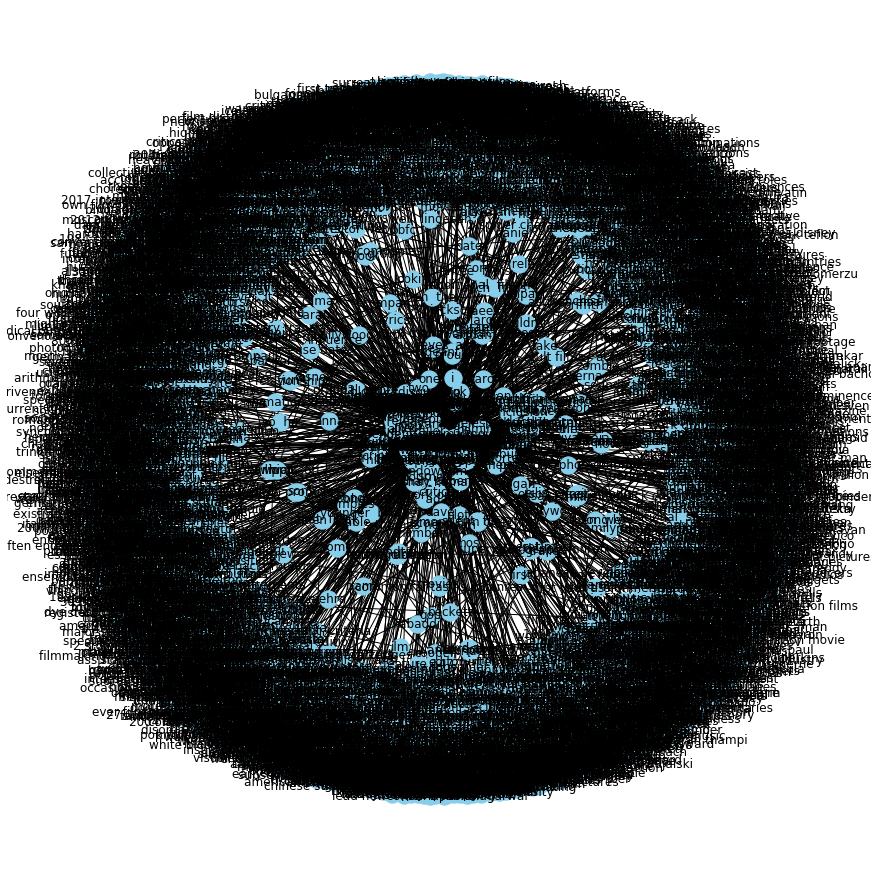

In [66]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

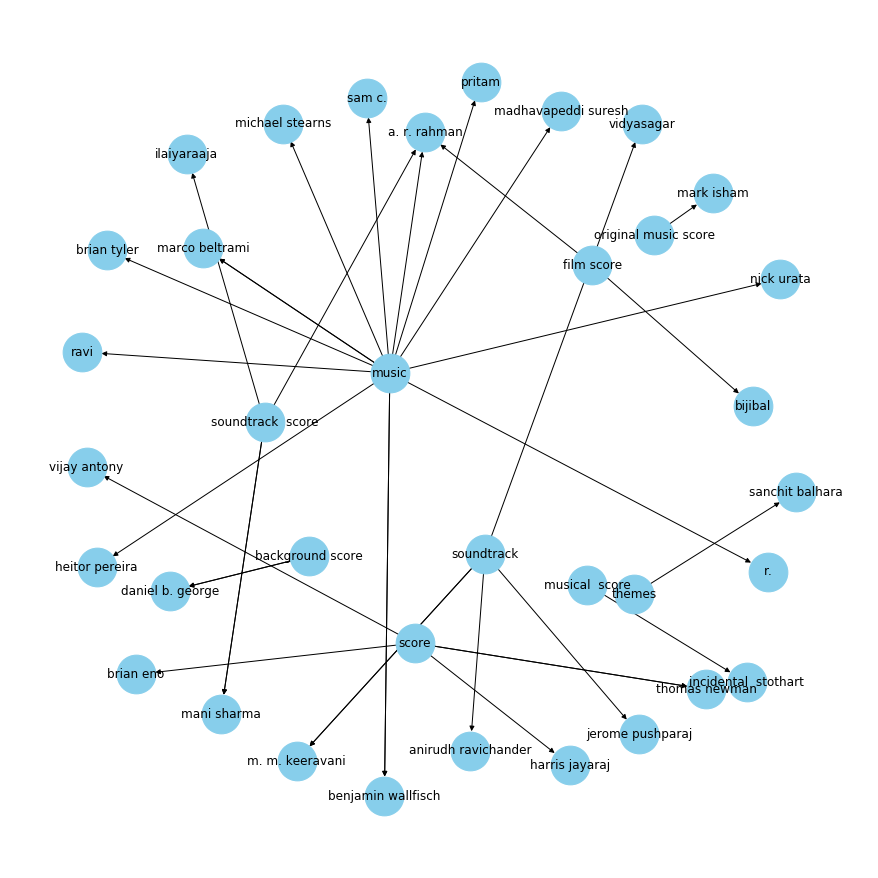

In [67]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="composed by"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()